![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Bryn Bowlden
***

## Overview


This project employs exploratory data analysis to derive insights for Microsoft Corporation's initiative to establish a new movie studio. Drawing from datasets sourced from IMDB and The Numbers, recommendations are provided regarding the genres that Microsoft should consider exploring. The metrics utilized to gauge the success and popularity of each genre include total net profit, average rating and average run times.

## Business Problem

Microsoft is venturing into the film industry with the establishment of a new movie studio, seeking to leverage exploratory data analysis to navigate the complex landscape of successful films. With limited prior expertise in the field, they aim to explore historical and current trends to glean actionable insights. Through this analysis, Microsoft seeks to inform their decision-making process and determine the most promising film genres to pursue.

***
The questions addressed by this analysis include:
* Do movie runtimes correlate to better average ratings?
* What are the most popular movie genres to produce and which have the greatest average ratings
* What genres have the highest net profit
***

## Data Understanding

The data sets used in this analysis can be seen below with a breif description for each in the assocaited subpoints:

* <u>imdb.title.basics:</u>
    * Conatins movie title details, including runtime duartion and genre
<p style="margin-bottom:10px"></p>
* <u>imdb.title.ratings:</u>
    * Contains IMDb's vote and rating data for movie titles
<p style="margin-bottom:10px"></p>
* <u>tn.movie_budgets.csv.gz:</u>
    * Contains movie title production costs as well as their domestic and worldwide gross


***
How the data will be used:

Utilization of the data will depend on its size and content diversity. For questions like 'which genres yield the highest net profit,' smaller, complete datasets will be employed to ensure accurate analysis.

***

## Importing Libraries

In [109]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

## Loading Data

In [379]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [380]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [381]:
title_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## Understanding and Preparing the Data

### <u>Title Basics - Overview</u>

In [113]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Some missing values but not a considerable amount given the size of the data frame. Initial thought is to replace null values for runtime_minutes with the median runtime_minutes

In [114]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Genres are comma seperated within a single row currently. This will make analysis dificult so I will explode them into seperate values

In [144]:
title_basics_duplicates = title_basics.duplicated(subset=['tconst']).sum()

print(title_basics_duplicates)

0


### <u>Title Basics - Runtime minutes</u>

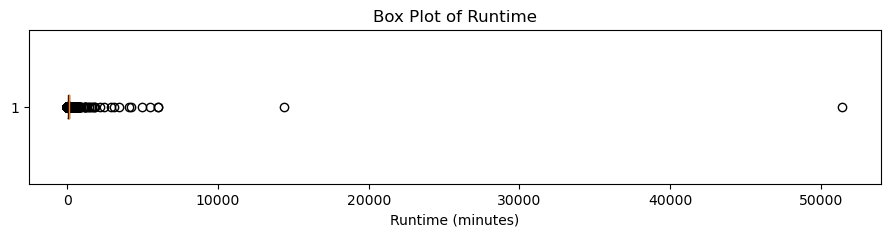

In [115]:
plt.figure(figsize=(11, 2))
plt.boxplot(title_basics['runtime_minutes'].dropna(), vert=False)
plt.xlabel('Runtime (minutes)')
plt.title('Box Plot of Runtime')
plt.show()

In [116]:
title_basics.describe()['runtime_minutes']

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

Need to remove the outliers for a more accuarate reprentaion of the average runtime. I will do this by calculating the IQR and setting a minimum and maximum threshold

In [117]:
Q1 = title_basics['runtime_minutes'].quantile(0.25)
Q3 = title_basics['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

In [118]:
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [119]:
filtered_title_basics = title_basics.copy()[(title_basics['runtime_minutes'] >= lower_threshold) & 
                                            (title_basics['runtime_minutes'] <= upper_threshold)]
filtered_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107577 entries, 1 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           107577 non-null  object 
 1   primary_title    107577 non-null  object 
 2   original_title   107574 non-null  object 
 3   start_year       107577 non-null  int64  
 4   runtime_minutes  107577 non-null  float64
 5   genres           105508 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ MB


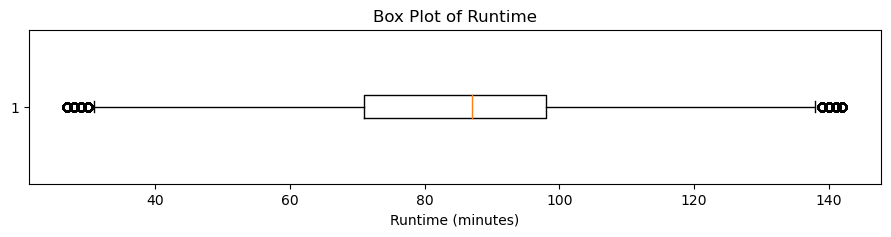

In [120]:
plt.figure(figsize=(11, 2))
plt.boxplot(filtered_title_basics['runtime_minutes'].dropna(), vert=False)
plt.xlabel('Runtime (minutes)')
plt.title('Box Plot of Runtime')
plt.show()

In [121]:
filtered_title_basics.describe()['runtime_minutes']

count    107577.000000
mean         85.098060
std          21.835599
min          27.000000
25%          71.000000
50%          87.000000
75%          98.000000
max         142.000000
Name: runtime_minutes, dtype: float64

In [122]:
filtered_title_basics['runtime_minutes'].median()

87.0

In [123]:
filtered_title_basics = filtered_title_basics.copy()

In [124]:
median_runtime = filtered_title_basics['runtime_minutes'].median()
title_basics_filtered['runtime_minutes'].fillna(median_runtime, inplace =True)
print(title_basics_filtered['runtime_minutes'].isnull().sum())

0


In [399]:
filtered_title_basics.describe()

,start_year,runtime_minutes
count,107577.000000,107577.000000
mean,2014.372933,85.098060
std,2.643690,21.835599
min,2010.000000,27.000000
25%,2012.000000,71.000000
50%,2014.000000,87.000000
75%,2017.000000,98.000000
max,2022.000000,142.000000


### <u>Title Basics - Exploding Genres</u>

In [125]:
filtered_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama


In [140]:
split_genres = filtered_title_basics.copy()
split_genres['genres'] = split_genres['genres'].str.split(',')
split_genres = split_genres.explode('genres')
split_genres.dropna(subset=['genres'], inplace=True)

split_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,Drama
146137,tt9916190,Safeguard,Safeguard,2019,90.0,Thriller


In [147]:
title_basics = split_genres

### <u>Title Ratings - Overview</u>

In [126]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [127]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [145]:
title_ratings_duplicates = title_ratings.duplicated(subset=['tconst']).sum()

print(title_ratings_duplicates)

0


### <u>Merging Title Basics with Title Ratings </u>

In [158]:
merged_titles = pd.merge(title_basics,title_ratings, how = 'inner', left_on = 'tconst', right_on = 'tconst')

In [ ]:
merged_titles.drop(columns=['original_title'], inplace=True)

In [161]:
merged_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114063 entries, 0 to 114062
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           114063 non-null  object 
 1   primary_title    114063 non-null  object 
 2   start_year       114063 non-null  int64  
 3   runtime_minutes  114063 non-null  float64
 4   genres           114063 non-null  object 
 5   averagerating    114063 non-null  float64
 6   numvotes         114063 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 6.1+ MB


In [162]:
merged_titles.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,Comedy,6.5,119
4,tt0100275,The Wandering Soap Opera,2017,80.0,Drama,6.5,119


In [153]:
merged_titles.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,114063.000000,114063.000000,114063.000000,1.140630e+05
mean,2014.191675,92.273779,6.283322,5.310068e+03
std,2.558831,18.745123,1.444872,3.447463e+04
min,2010.000000,27.000000,1.000000,5.000000e+00
25%,2012.000000,82.000000,5.400000,1.800000e+01
50%,2014.000000,91.000000,6.400000,7.600000e+01
75%,2016.000000,103.000000,7.300000,4.830000e+02
max,2019.000000,142.000000,10.000000,1.005960e+06


In [303]:
title_genre_counts = merged_titles['genres'].value_counts().sort_values(ascending=False)

In [410]:
top_10_genres = title_genre_counts.sort_values(ascending=False).head(10).index
top_10_movies = merged_titles[merged_titles['genres'].isin(top_10_genres)]
genre_avg_rating = merged_titles.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
average_rating_per_genre_top_10 = top_10_movies.groupby('genres')['averagerating'].mean()
average_rating_per_genre_top_10 = average_rating_per_genre_top_10.sort_values(ascending=False)
average_rating_per_genre_top_10

genres
Documentary    7.314857
Biography      7.165351
Drama          6.380118
Adventure      6.164845
Romance        6.143706
Crime          6.088710
Comedy         6.009137
Action         5.752570
Thriller       5.565270
Horror         4.929603
Name: averagerating, dtype: float64

In [305]:
genre_avg_rating = merged_titles.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

### <u>Title Budgets - Overview</u>

In [164]:
title_budgtes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [165]:
title_budgtes.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Need to remove the '$' and ',' from production_budget, domestic_gross and world_wide gross, allowing us to calculate the net profit

### <u>Title Budgets - Clean data and Calculate net profit</u>

In [253]:
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_clean:
    title_budgets[column] = title_budgets[column].str.replace('$', '').str.replace(',', '')

title_budgets[columns_to_clean] = title_budgets[columns_to_clean].apply(pd.to_numeric)

In [254]:
title_budgets['net_profit'] = title_budgets['worldwide_gross'] - title_budgets['production_budget']

In [255]:
title_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [256]:
title_budgets.replace(0,np.nan, inplace=True)

In [257]:
title_budgets.dropna(inplace=True)

In [258]:
title_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int64  
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   net_profit         5234 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 327.1+ KB


In [259]:
title_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,net_profit
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5.234000e+03
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,6.672803e+07
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,1.518522e+08
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,-2.002376e+08
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,-1.396634e+06
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,1.357260e+07
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,7.088258e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


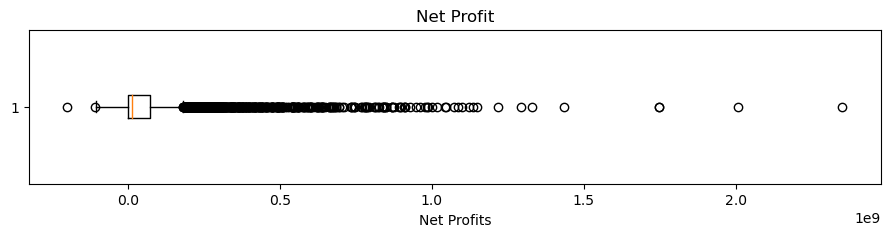

In [260]:
plt.figure(figsize=(11, 2))
plt.boxplot(title_budgets['net_profit'].dropna(), vert=False)
plt.xlabel('Net Profits')
plt.title('Net Profit')
plt.show()

In [262]:
title_budgets['net_profit'] = pd.to_numeric(title_budgets['net_profit'], errors='coerce')

In [263]:
Q1 = title_budgets['net_profit'].quantile(0.25)
Q3 = title_budgets['net_profit'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [266]:
filtered_title_budgets = title_budgets[(title_budgets['net_profit'] >= lower_threshold) & (title_budgets['net_profit'] <= upper_threshold)]

filtered_title_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4501 entries, 11 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4501 non-null   int64  
 1   release_date       4501 non-null   object 
 2   movie              4501 non-null   object 
 3   production_budget  4501 non-null   int64  
 4   domestic_gross     4501 non-null   float64
 5   worldwide_gross    4501 non-null   float64
 6   net_profit         4501 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 281.3+ KB


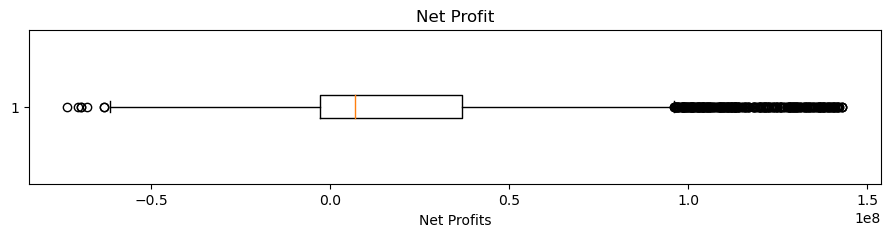

In [271]:
plt.figure(figsize=(11, 2))
plt.boxplot(filtered_title_budgets['net_profit'].dropna(), vert=False)
plt.xlabel('Net Profits')
plt.title('Net Profit')
plt.show()

In [272]:
title_budgets = filtered_title_budgets

In [282]:
title_budgets.loc[:,'ROI'] = (title_budgets['net_profit'] / title_budgets['production_budget']) * 100
title_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,net_profit,ROI
count,4501.000000,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4501.000000
mean,50.131971,2.496884e+07,2.562591e+07,4.605251e+07,2.108368e+07,346.444261
std,28.972184,2.886567e+07,2.812526e+07,5.386316e+07,3.889973e+07,3140.162528
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,-7.348268e+07,-99.987455
25%,25.000000,5.000000e+06,2.938000e+06,5.871603e+06,-2.874065e+06,-38.241400
50%,50.000000,1.500000e+07,1.593507e+07,2.535900e+07,6.981635e+06,58.806323
75%,75.000000,3.500000e+07,3.936049e+07,6.883874e+07,3.662752e+07,224.615151
max,100.000000,2.750000e+08,2.137675e+08,3.931513e+08,1.429959e+08,179900.000000


### Merge title budgets with merged titles [genres]

In [354]:
profit_by_genre = pd.merge(title_budgets, merged_titles[['primary_title', 'tconst', 'genres','averagerating']], how='inner', left_on='movie', right_on='primary_title')



In [355]:
profit_by_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,primary_title,tconst,genres,averagerating
0,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512.0,393151347.0,118151347,42.964126,Solo: A Star Wars Story,tt3778644,Action,7.0
1,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512.0,393151347.0,118151347,42.964126,Solo: A Star Wars Story,tt3778644,Adventure,7.0
2,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512.0,393151347.0,118151347,42.964126,Solo: A Star Wars Story,tt3778644,Fantasy,7.0
3,14,"Mar 9, 2012",John Carter,275000000,73058679.0,282778100.0,7778100,2.828400,John Carter,tt0401729,Action,6.6
4,14,"Mar 9, 2012",John Carter,275000000,73058679.0,282778100.0,7778100,2.828400,John Carter,tt0401729,Adventure,6.6


In [356]:
profit_by_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4305 non-null   int64  
 1   release_date       4305 non-null   object 
 2   movie              4305 non-null   object 
 3   production_budget  4305 non-null   int64  
 4   domestic_gross     4305 non-null   float64
 5   worldwide_gross    4305 non-null   float64
 6   net_profit         4305 non-null   int64  
 7   ROI                4305 non-null   float64
 8   primary_title      4305 non-null   object 
 9   tconst             4305 non-null   object 
 10  genres             4305 non-null   object 
 11  averagerating      4305 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 403.7+ KB


### <u>Understanding Net Profit and ROI<u/>

In [358]:
genre_stats = profit_by_genre.groupby('genres').agg({'averagerating':'mean','net_profit':'mean', 'ROI':'mean', 'tconst':'count'})
genre_stats.columns = ['mean_rating','mean_profits', 'mean_ROI', 'movie_count']

Calculate the average ROI for each genre

In [375]:
mean_ROI_sorted = genre_stats.sort_values(by='mean_ROI', ascending=False)
mean_ROI_sorted = mean_ROI_sorted['mean_ROI']
mean_ROI_sorted

genres
Horror         894.938779
Mystery        674.058808
Thriller       518.280370
Animation      348.692010
Romance        296.606012
History        244.854051
Drama          233.990544
Family         233.667630
Biography      197.492189
Comedy         195.028319
Sport          193.743587
Fantasy        186.968208
Documentary    172.077608
Music          166.606093
Sci-Fi         156.204501
Adventure      152.250730
Crime          120.315440
Action         116.727525
News            95.367885
War             62.532148
Musical         21.960021
Western        -29.062279
Name: mean_ROI, dtype: float64

## Data visualization

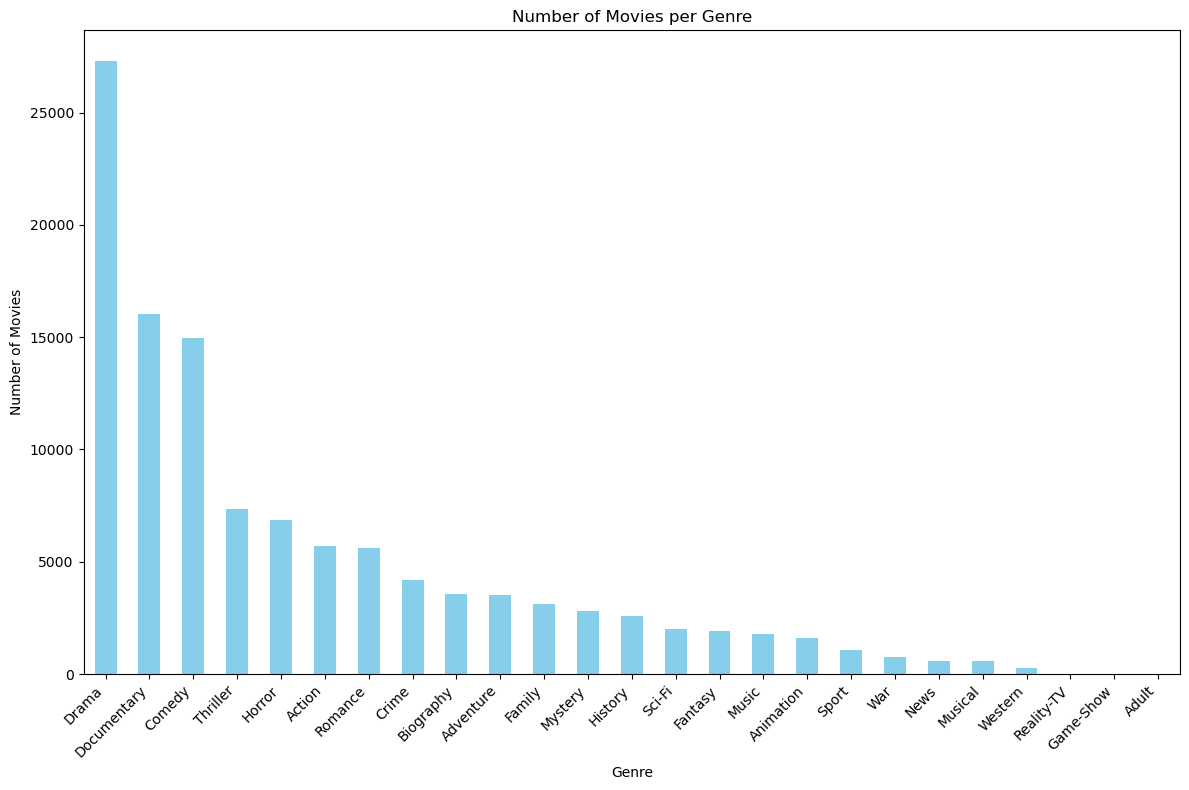

In [392]:
#Number of movies per genre
plt.figure(figsize=(12, 8))
title_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Number_of_movies_per_genre.png')
plt.show()

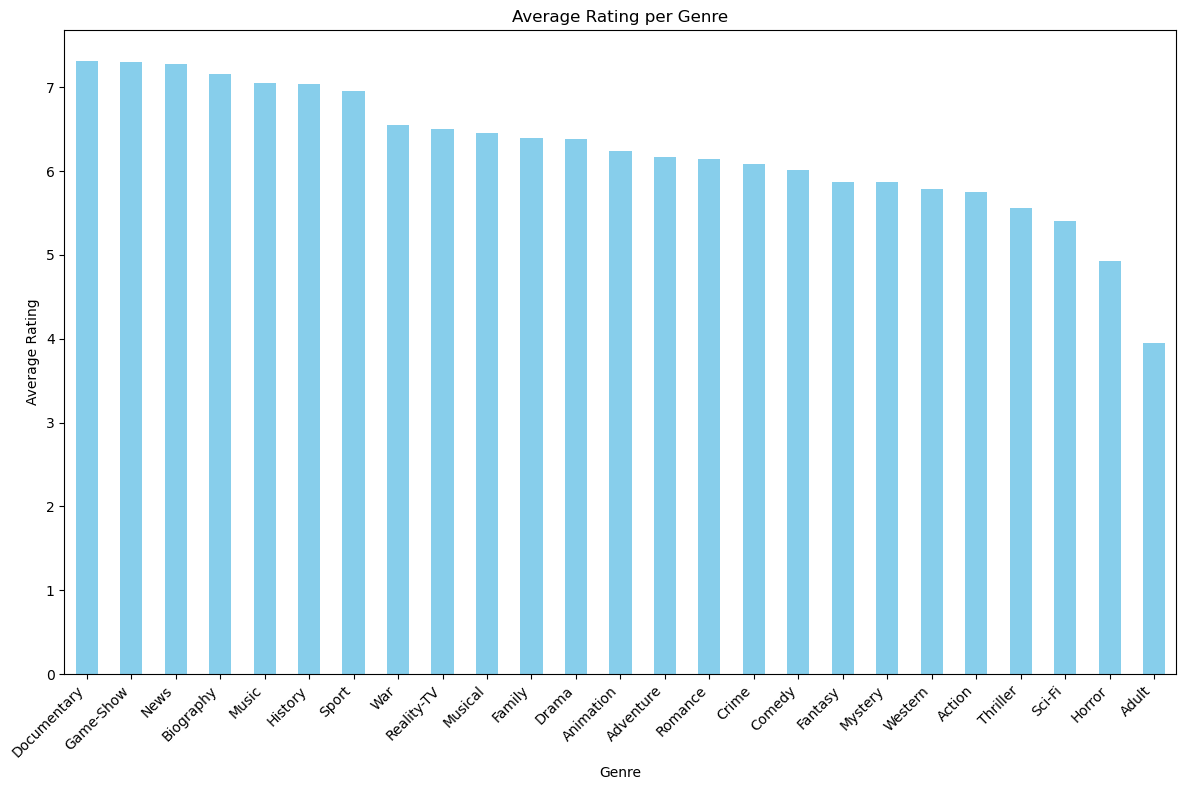

In [400]:
#Average rating per genre

plt.figure(figsize=(12, 8))
genre_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Average_rating_per_genre.png')
plt.show()

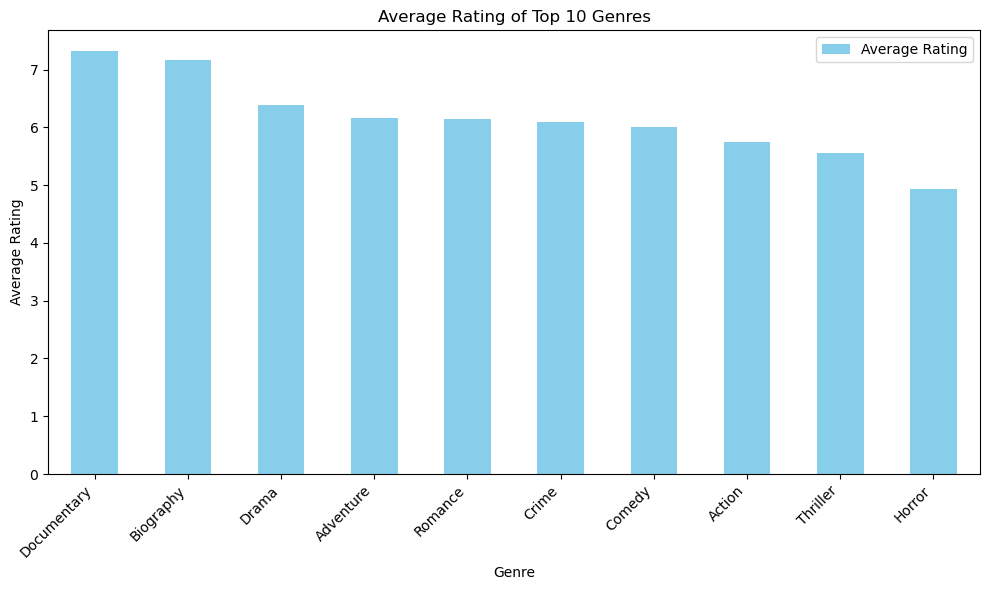

In [412]:
fig, ax = plt.subplots(figsize=(10, 6))
average_rating_per_genre_top_10.plot(kind='bar', ax=ax, color='skyblue', label='Average Rating')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating of Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.savefig('Average_ratings_top_10')
plt.show()

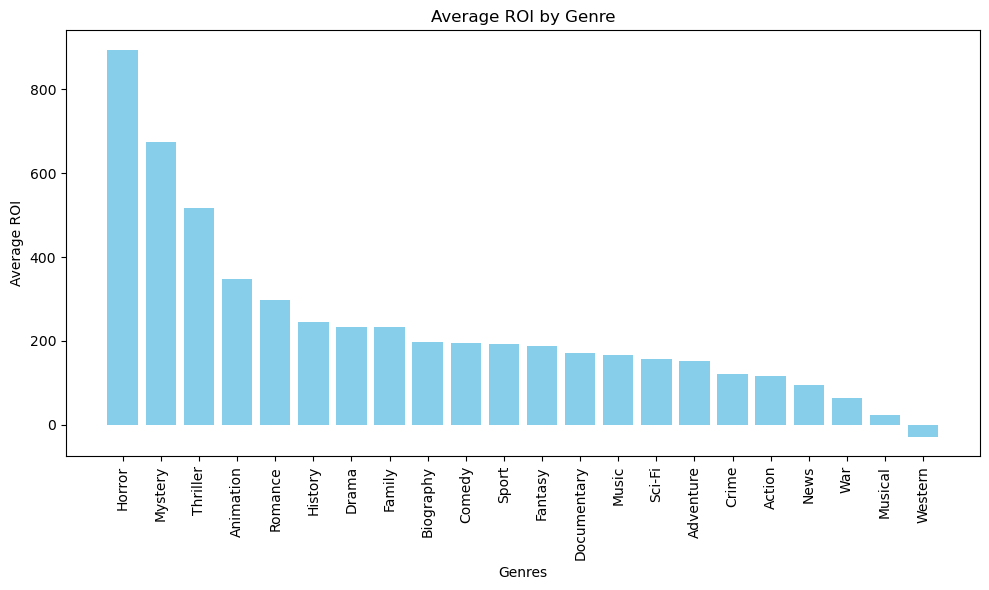

In [394]:
#average ROI by genre

plt.figure(figsize=(10, 6))
plt.bar(genre_stats_sorted.index, genre_stats_sorted['mean_ROI'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.xticks(rotation=90)  # Rotate genre labels for better readability
plt.tight_layout()
plt.savefig('Average_ROI_by_genre.png')
plt.show()

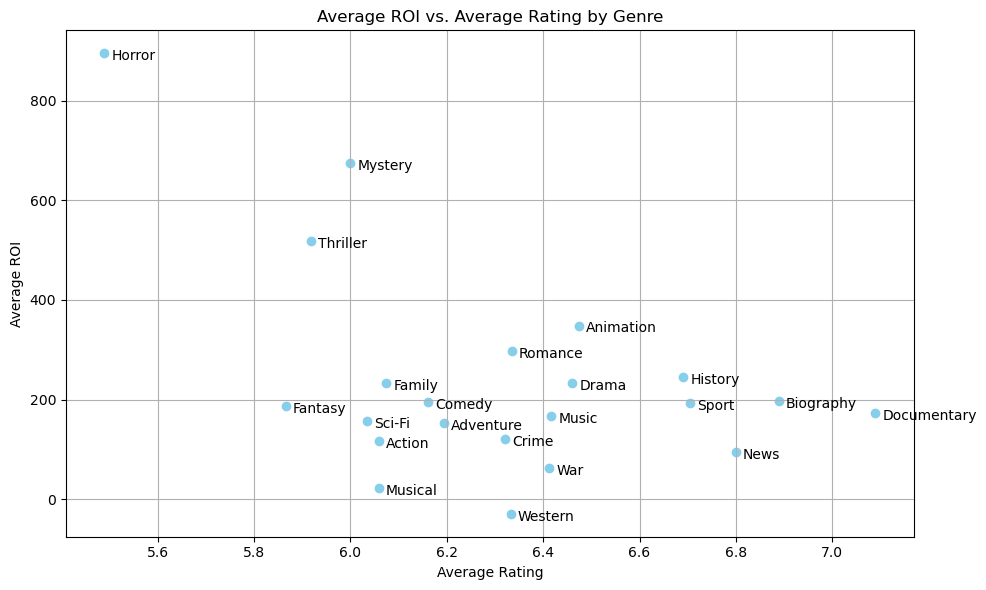

In [395]:
#ROI vs rating by genre
plt.figure(figsize=(10, 6))
plt.scatter(genre_stats['mean_rating'], genre_stats['mean_ROI'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Average ROI')
plt.title('Average ROI vs. Average Rating by Genre')
for i, txt in enumerate(genre_stats.index):
    plt.annotate(txt, (genre_stats['mean_rating'][i], genre_stats['mean_ROI'][i]), xytext=(5,-5), ha='left', textcoords='offset points')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROI vs rating by genre.png')
plt.show()

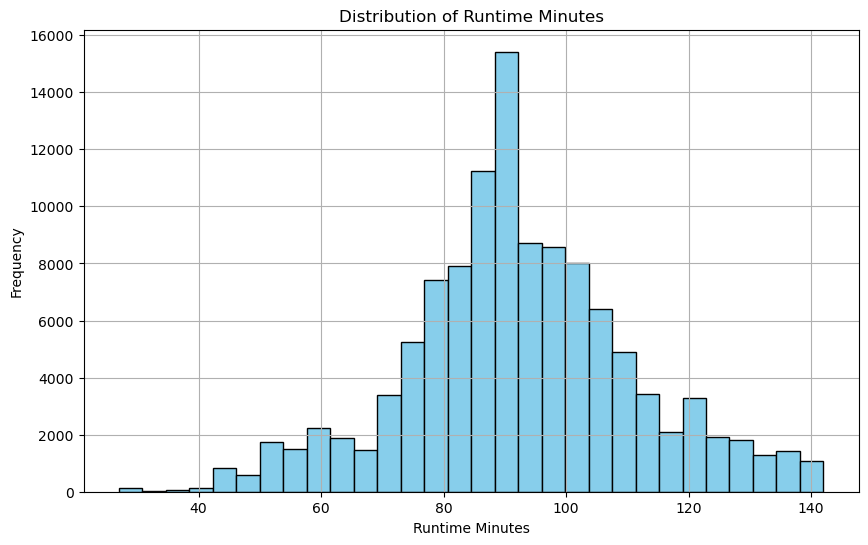

In [396]:
# runtime minutes
plt.figure(figsize=(10, 6))
plt.hist(merged_titles['runtime_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('runtime-minutes.png')
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***